# Linear Regression

### Simple Linear Regression
Given data $(x_1, y_1), \ldots, (x_n, y_n)$, we would like to find a line 
$$Y = \hat \beta_0 + \hat\beta_1X$$
to best fit the data in the sense that the mean square error(MSE) is minimized. 

Let $\tilde y_i = \hat\beta_0+\hat\beta_1x_i$ be the prediction. The residual error is defined as $e_i = y_i-\tilde y_i$, and the mean square error is 
$$MSE = \frac{1}{n}\sum_1^n e_i^2.$$

We also define the Residual Sum of Squares(RSS) as 
$$RSS = \sum_1^n e_i^2$$

This problem has an analytic solution
$$\begin{align}\hat\beta_1 &= \frac{\sum_1^n (x_i-\overline{x})(y_i-\overline{y})}{\sum_1^n (x_i-\overline{x})^2} \\ \hat\beta_0 &= \overline{y} - \beta_1\overline{x}\end{align}$$
We call this as the least square estimator for $\beta_0, \beta_1$.

#### Assessing the above estimates
One way to understand the above formula is that we may think that we have $$Y = \beta_0+\beta_1X+\epsilon$$ as ground truth, where $\epsilon$ is the mean zero random error term, and we assume that it is independent of $X$. The $\hat\beta_0, \hat\beta_1$ is an estimate of $\beta_0, \beta_1$ based on the observed data $(x_1, y_1),\ldots, (x_n, y_n)$.

Then, we see that 
$$\begin{align}\beta_1 &= \frac{Cov(X, Y)}{Cov(X, X)} \\ 
\beta_0 &= Y-\beta_1X-\epsilon$\end{align}$$
The least square estimator is an unbiased estimator for $\beta_1, \beta_0$. Now, we compute their standard error of this estimator, and we get
$$\begin{align}
SE(\hat\beta_1)^2 &= \frac{\sigma^2}{\sum_1^n(x_i-\overline{x})^2} 
\\ SE(\hat\beta_0)^2 &= \sigma^2\left[\frac{1}{n}+\frac{\overline{x}^2}{\sum_1^n(x_i-\overline{x})^2}\right]\end{align}$$
where $\sigma^2$ is the variance of the error $\epsilon$.

The key observation is that 
1. $SE(\hat\beta_1)$ is small when the data $x_i$ are more spread out.
2. $SE(\hat\beta_0)$ is small when $\overline{x_i}$ is near zero. If $\overline{x_i} = 0$, we would have $\hat\beta_0 = \overline{y}$.

In actual data, $\sigma$ is not given, but we can estimate it by the **residual standard error** 
$$RSE = \sqrt{RSS/(n-2)}$$

With the standard error, we can build the 95\% confidence interval for $\beta_0,\beta_1$, and they are $\hat\beta_0\pm 2SE(\hat\beta_0)$ and $\hat\beta_1\pm 2SE(\hat\beta_1)$. 

To test the null hupothesis $H_0: \beta_1 = 0$ ($Y, X$ has no relation), we use the t-test with 
$$t = \frac{\hat{\beta_1}}{SE(\hat\beta_1)}$$

#### Assessing the model
##### RSE
The RSE is an estimate of $\sigma$, which is the STD of the error $\epsilon$. It is the average amount that the response is deviated from the true regression line. Another way to think about this is that even if we get $\beta_0, \beta_1$ correctly, the prediction is still off by $RSE$ from the observed value. It is usually considered as **lack of fit** of the model. 

 One issue of using RSE is that it is measured in the units of $Y$. It is hard to tell what is a good RSE.
    
##### $R^2$ statistics
It tells the **proportion of variance explained**. The good thing about $R^2$ is that it takes value between 0 and 1, and independent of the scale of Y. 
    $$R^2 = \frac{TSS - RSS}{TSS} = 1-\frac{RSS}{TSS}$$
where $TSS = \sum_1^n (y_i-\overline{y})^2$ is the total sum of squares. 

We can think about the TSS as the variability of the data before performing the regression. In contrast, the RSS is the amount of variability that is left unexplained after performing the regression. Thus, TSS-RSS measures the amount of variability in the response that is explained by performing the regression. Thus, $R^2$ measures the proportion of variability in Y that can be explained by $X$. 

$R^2$ closing to 1 indicates a large proportion of the variability in $Y$ is explained by the regression.

Another way to understand $R^2$ is that it is an estimator of $1-Var(\epsilon)/Var(Y)$. This is also why it is called the proportion of variance explained. 

The MSE is: 25.1245
The estimate is beta0 = -0.2334 and beta1 = 3.2852
The SE of beta 1 is 0.1239
The SE of beta 0 is 0.3777
The RSE is 5.0377
The R^2 is 0.7802


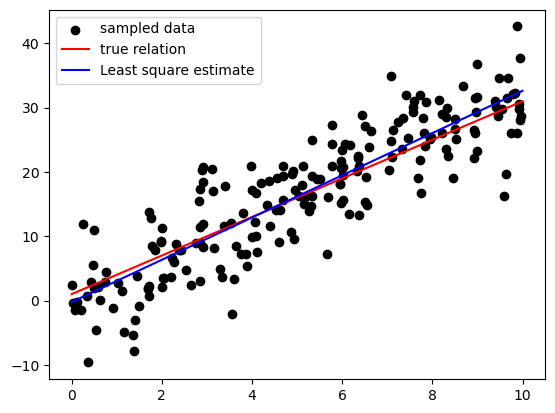

In [266]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng()

beta0 = 1
beta1 = 3
sigma = 5
sample_size = 200

# X is sampled from uniform distribution of [0, 10], Error E is sampled from N(0,sigma^2)
X = 10 * rng.random(size = (sample_size,)) 
E = rng.normal(scale = sigma, size = (sample_size,))
Y = beta0 + beta1 * X + E

# We compute the estimate of beta_0 and beta_1 based on the sampled data
X_mean = X.mean()
Y_mean = Y.mean()

# Computing the estimate using the analytic formula
beta1_estimate = np.dot((X - X_mean), (Y-Y_mean))/np.dot((X - X_mean), (X-X_mean))
beta0_estimate = Y_mean - beta1_estimate * X_mean

Y_predicted = beta0_estimate + beta1_estimate * X
RSS = ((Y_predicted - Y) ** 2).sum()
MSE = RSS/sample_size
print(f"The MSE is: {MSE:.4f}")
RSE = np.sqrt(RSS/(sample_size-2))
TSS = ((Y - Y_mean) ** 2).sum()
R2 = 1-RSS/TSS
SE_beta1 = np.sqrt(RSE ** 2/np.dot((X - X_mean), (X-X_mean)))
SE_beta0 = np.sqrt(RSE ** 2 * (1/sample_size) + X_mean**2/np.dot(X-X_mean, X-X_mean))

print(f"The estimate is beta0 = {beta0_estimate:.4f} and beta1 = {beta1_estimate:.4f}")
print(f"The SE of beta 1 is {SE_beta1:.4f}")
print(f"The SE of beta 0 is {SE_beta0:.4f}")
print(f"The RSE is {RSE:.4f}")
print(f"The R^2 is {R2:.4f}")

# Drawing the figure
fig, ax = plt.subplots()
ax.scatter(X, Y, color = 'black', label = 'sampled data')
X_list = np.linspace(0, 10, 100)
Y_list = beta0 + beta1 * X_list
Y_list_estimate = beta0_estimate + beta1_estimate * X_list
ax.plot(X_list, Y_list, color = 'red', label = "true relation")
ax.plot(X_list, Y_list_estimate, color = 'blue', label = "Least square estimate")
ax.legend()
plt.show()

In [267]:
# same computation with sklearn package
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X_train = np.expand_dims(X, axis = 1)
model = LinearRegression()
model.fit(X_train, Y)
y_pred = model.predict(X_train)

print(f"The linear regression model tells beta0 = {model.intercept_:.4f}, beta1 = {model.coef_[0]:.4f}")
print(f"The MSE is {mean_squared_error(Y, y_pred):.4f}")

y_pred = model.predict(X_train)
print(f"The R2 is {r2_score(Y, y_pred):.4f}")

The linear regression model tells beta0 = -0.2334, beta1 = 3.2852
The MSE is 25.1245
The R2 is 0.7802


### Multilinear Regression
Suppose that we have predictor $X_1,\ldots, X_p$. Then, a multilinear regression has model
$$Y = \beta_0 + \beta_1X_1+\cdots+\beta_pX_p+\epsilon$$

**Remark:**
It is possible that when running the simple linear regression of $Y$ with $X_1$, we find that $Y$ and $X_1$ are related with $\hat \beta_1\neq 0$, yet when running the multilinear regression, we get $\hat \beta_1 = 0$ instead. This can be caused by $X_1$ having correlation with other predictors. 

Also, the RSE is computed by 
$$RSE = \sqrt{RSS/(n-p-1)}$$

### The effect of doubling the data
Suppose that we accidentally doubled the data. Then, the regression coefficient remains the same. However, the error $\epsilon_i$ are no longer correlated. We now have $2n$ samples, and the confident interval of the regression coefficient would be falsely narrowed by $\sqrt{2}$.

In general, if there are correlation among the error $\epsilon_i$, then the standard error we computed will be smaller than its true standard error, and we will have a false confidence towards our model.

The correlation in error term appear very often in time series data.

In [288]:
rng = np.random.default_rng()
sample_size = 500

beta0 = 2
beta1 = 3
beta2 = 4
beta3 = 5
sigma = 5

X1 = rng.normal(loc = 0, scale = 5, size = sample_size)
X2 = rng.normal(loc = 2, scale = 3, size = sample_size)
X3 = X1 * X2 - 1
E = rng.normal(0, sigma, sample_size)

Y = beta0 + beta1 * X1 + beta2 * X2 + beta3 * X3 + E



model = LinearRegression()
X = np.stack([X1, X2], axis =1)
model.fit(X, Y)
Y_pred = model.predict(X)

model.coef_
model.intercept_
r2_score(Y, Y_pred)

0.39368389687020555